In [44]:
# 0. Import numpy, pandas, matplotlib.pyplot and seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 1. Read the Dataset bigmart.csv
#    Aim is to predict the sales of each product at a particular outlet

bigmart=pd.read_csv("bigmart.csv")
# 2. Check the shape of the dataset
bigmart.shape

(8523, 12)

In [52]:
# 3. Check the head of the dataset
bigmart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FD,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DR,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FD,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FD,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NC,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [35]:
# 4. First Check for the Missing Values in all the columns
bigmart.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [98]:
# 5. For the missing values on the columns, impute them
#    - If it's numerical --> impute using the mean : bigmart.mean()
#    - If it's categorical --> impute using the element that appears more times : bigmart.mode()

In [ ]:
#First Try

In [64]:
bigmart.dtypes[bigmart.isnull().any()].index

Index(['Item_Weight', 'Outlet_Size'], dtype='object')

In [3]:
(bigmart.dtypes[bigmart.isnull().any()])=='float64'

Item_Weight     True
Outlet_Size    False
dtype: bool

In [52]:
Num_miss_val=bigmart[bigmart.dtypes[bigmart.isnull().any()].index[(bigmart.dtypes[bigmart.isnull().any()])=='float64' ]]
Cat_miss_val=bigmart[bigmart.dtypes[bigmart.isnull().any()].index[(bigmart.dtypes[bigmart.isnull().any()])=='object' ]]

In [64]:
Num_miss_val.mean()

Item_Weight    12.857645
dtype: float64

In [89]:
Cat_miss_val.mode().values[0][0]

'Medium'

In [96]:
Num_miss_val=Num_miss_val.fillna(Num_miss_val.mean())
Cat_miss_val=Cat_miss_val.fillna(Cat_miss_val.mode().values[0][0])
bigmart[bigmart.dtypes[bigmart.isnull().any()].index[(bigmart.dtypes[bigmart.isnull().any()])=='float64']]=Num_miss_val
bigmart[bigmart.dtypes[bigmart.isnull().any()].index[(bigmart.dtypes[bigmart.isnull().any()])=='object' ]]=Cat_miss_val

In [97]:
bigmart.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
# Correction

In [5]:
bigmart['Item_Weight']= bigmart ['Item_Weight'].fillna(bigmart['Item_Weight'].mean())
bigmart['Outlet_Size']= bigmart ['Outlet_Size'].fillna(bigmart['Outlet_Size'].mode()[0])

In [6]:
# 6. Let's Check the Missing Values again. The total number has to be 0
bigmart.isnull().sum().sum()

0

/Users/thomasdunn/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/thomasdunn/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/thomasdunn/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warn

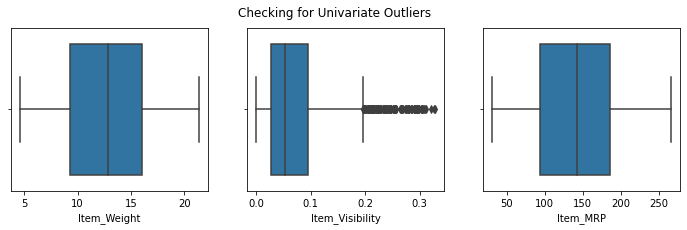

In [8]:
# 7. Check for Outliers in Item Weight, Item Visibility, and Item MRP.
#    - Use plt.rcParams['figure.figsize'] = (12, 3)
#    - Use boxplot
plt.rcParams['figure.figsize']=(12,3)

plt.subplot(1,3,1)
sns.boxplot(bigmart['Item_Weight'])

plt.subplot(1,3,2)
sns.boxplot(bigmart['Item_Visibility'])

plt.subplot(1,3,3)
sns.boxplot(bigmart['Item_MRP'])

plt.suptitle("Checking for Univariate Outliers")
plt.show()

In [27]:
# 8. If appears some outliers in one of the columns:
#    - Remove all the rows that contain extrem values in that column.
bigmart=bigmart[bigmart['Item_Visibility']<0.18]
bigmart.shape

(8295, 12)

In [51]:
# Or: bigmart=bigmart[~bigmart['Item_Visibility']>0.18]

/Users/thomasdunn/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/thomasdunn/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/thomasdunn/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warn

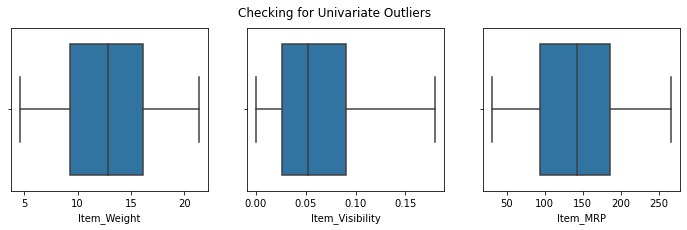

In [28]:
# 9. Check again outliers with boxplot
plt.rcParams['figure.figsize']=(12,3)

plt.subplot(1,3,1)
sns.boxplot(bigmart['Item_Weight'])

plt.subplot(1,3,2)
sns.boxplot(bigmart['Item_Visibility'])

plt.subplot(1,3,3)
sns.boxplot(bigmart['Item_MRP'])

plt.suptitle("Checking for Univariate Outliers")
plt.show()

In [39]:
# 10. Clean the Item_Identifier: 
#    - Only take into account the two first characters of each value.
bigmart['Item_Identifier']=[x[:2] for x in bigmart['Item_Identifier']]
bigmart['Item_Identifier'].value_counts()

FD    5960
NC    1557
DR     778
Name: Item_Identifier, dtype: int64

In [46]:
# 11. Clean the Item_Fat_Content:
#    - Print all the values of this column.
#    - Are there values with the same meaning but different names?
#       - Then replace the values with a unique identifier
bigmart['Item_Fat_Content'].value_counts()

Low Fat    4965
Regular    2805
LF          304
reg         114
low fat     107
Name: Item_Fat_Content, dtype: int64

In [49]:
bigmart['Item_Fat_Content']=bigmart['Item_Fat_Content'].replace(to_replace= 'LF', value='Low Fat')
bigmart['Item_Fat_Content']=bigmart['Item_Fat_Content'].replace(to_replace= 'low fat', value='Low Fat')
bigmart['Item_Fat_Content']=bigmart['Item_Fat_Content'].replace(to_replace= 'reg', value='Regular')

In [50]:
bigmart['Item_Fat_Content'].value_counts()

Low Fat    5376
Regular    2919
Name: Item_Fat_Content, dtype: int64